# Patient Data Cleaning
Clean the patient dataset and produce basic summaries and a cleaned CSV.

In [1]:
import pandas as pd
df = pd.read_csv('patient_data.csv', parse_dates=['visit_date'])
print('Loaded', len(df), 'rows')
display(df.head())


Loaded 6 rows


,patient_id,age,bp_systolic,bp_diastolic,medication_given,visit_date
0,101,34.0,120.0,80.0,Yes,2024-01-10
1,102,67.0,145.0,90.0,No,2024-01-15
2,103,NaN,130.0,85.0,Yes,2024-01-20
3,104,45.0,NaN,88.0,Yes,2024-02-02
4,105,29.0,110.0,NaN,No,2024-02-10


In [2]:
# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())
# Fill bp values with median
df['bp_systolic'] = df['bp_systolic'].fillna(df['bp_systolic'].median())
df['bp_diastolic'] = df['bp_diastolic'].fillna(df['bp_diastolic'].median())
df['medication_given'] = df['medication_given'].str.capitalize()
print('Missing values after cleaning:\n', df.isnull().sum())


Missing values after cleaning:
 patient_id          0
age                 0
bp_systolic         0
bp_diastolic        0
medication_given    0
visit_date          0
dtype: int64


In [3]:
# Summary stats and export
summary = df.describe(include='all')
summary.to_csv('patient_data_summary.csv')
df.to_csv('cleaned_patient_data.csv', index=False)
print('Saved patient_data_summary.csv and cleaned_patient_data.csv')


Saved patient_data_summary.csv and cleaned_patient_data.csv


Saved patient_age_distribution.png


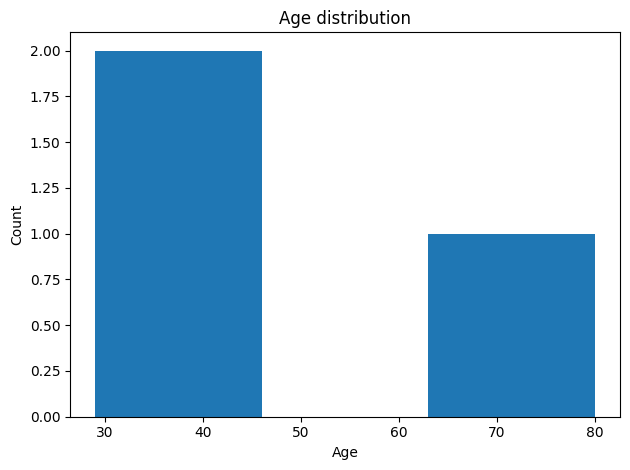

In [4]:
# Visual: Age distribution
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=6)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.tight_layout()
plt.savefig('patient_age_distribution.png')
print('Saved patient_age_distribution.png')
